In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
import pdb
from sklearn import svm, linear_model
from sklearn.ensemble import RandomForestClassifier

In [2]:
# from itertools import izip_longest
# import csv
# with open('dexter_train.labels', 'rb') as csv1,open('dexter_train.data', 'rb') as csv2,open('concat.txt', 'w') as out:
#     spam1 = csv.reader(csv2)
#     spam2 = csv.reader(csv1)
#     last_column=list(izip_longest(*spam2))[-1]
#     for i,j in  izip_longest(spam1,last_column):
#         out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')
        
from itertools import izip_longest
import csv
with open('dexter_train.labels', 'rb') as csv1,open('dexter_train.data', 'rb') as csv2,open('concat.txt', 'w') as out:
    spam1 = csv.reader(csv1)
    spam2 = csv.reader(csv2)
    last_column=list(izip_longest(*spam2))[-1]
    for i,j in  izip_longest(spam1,last_column):
        out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')
        
from itertools import izip_longest
import csv
with open('dexter_valid.labels', 'rb') as csv1,open('dexter_valid.data', 'rb') as csv2,open('valid.txt', 'w') as out:
    spam1 = csv.reader(csv1)
    spam2 = csv.reader(csv2)
    last_column=list(izip_longest(*spam2))[-1]
    for i,j in  izip_longest(spam1,last_column):
        out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')

In [20]:
trainLabl=np.genfromtxt('dexter_train.labels')
# pdb.set_trace()
TrainData = load_svmlight_file("concat.txt")
valid=load_svmlight_file('valid.txt')
# trainData=np.genfromtxt('dexter_train.data')
# param=np.genfromtxt('dexter.param')
# valid=np.genfromtxt('dexter_valid.data')


In [25]:
Xtrain=TrainData[0]
Ytrain=TrainData[1]
Xvalid=valid[0]
Yvalid=valid[1]

In [26]:
print('train', Xtrain[0:100,0:100])
print('valid', Xvalid[0:100,0:100])

('train', <100x100 sparse matrix of type '<type 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>)
('valid', <100x100 sparse matrix of type '<type 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>)


In [6]:
clf = svm.SVC()
clf.fit(Xtrain, Ytrain) 
Predict=clf.predict(Xvalid)
np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100

50.0

In [7]:
Xtrain.shape


(300, 19999)

#SVM  gives 50% error

In [8]:
s=0
N=20
for j in range(N):
#     clf = RandomForestClassifier()
    clf = RandomForestClassifier(max_features=7375)
    clf.fit(Xtrain.todense(), Ytrain)  
    Predict=clf.predict(Xvalid)
    s+=np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100
    print(np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100)
s=s/N
print s

10.3333333333
10.3333333333
11.0
12.3333333333
9.0
10.6666666667
10.3333333333
10.6666666667
9.0
12.0
8.66666666667
9.0
11.3333333333
9.66666666667
10.0
10.0
8.0
11.6666666667
11.3333333333
11.6666666667
10.35


# Random Forests give 17% errror

In [9]:
alpha=0.1
for i in range(20):
    clf = linear_model.Lasso(alpha)
#     clf.fit(Xvalid.todense())
    clf.fit(Xtrain, Ytrain)
    Predict=clf.predict(Xvalid)
    Predict[Predict>=0]=1
    Predict[Predict<0]=-1
    print(np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100, alpha)
    alpha=0.8*alpha

(10.333333333333334, 0.1)
(10.0, 0.08000000000000002)
(10.666666666666668, 0.06400000000000002)
(10.666666666666668, 0.051200000000000016)
(10.666666666666668, 0.04096000000000002)
(10.666666666666668, 0.03276800000000001)
(10.333333333333334, 0.026214400000000013)
(10.0, 0.02097152000000001)
(9.6666666666666661, 0.016777216000000008)
(9.3333333333333339, 0.013421772800000007)
(10.0, 0.010737418240000006)
(10.666666666666668, 0.008589934592000005)
(10.333333333333334, 0.0068719476736000045)
(11.0, 0.005497558138880004)
(12.0, 0.004398046511104004)
(10.666666666666668, 0.0035184372088832034)
(12.333333333333334, 0.002814749767106563)
(11.333333333333332, 0.0022517998136852503)
(10.666666666666668, 0.0018014398509482003)
(11.666666666666666, 0.0014411518807585604)


/Users/susiesargsyan/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


#Lasso is bad, ?% error, but try to combine with SVM


####dum to try since it's a regression not classification, therefore we set a threshhold on prediction

In [10]:
lam=0.5
s=0
for i in range(15):
    clf=svm.LinearSVC(penalty='l1', dual=False, C=lam)
    clf.fit(Xtrain, Ytrain)
    Predict=clf.predict(Xvalid)
    s+=np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100
    print(np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100, lam)
    lam=0.7*lam
    
print s/15

(9.6666666666666661, 0.5)
(9.6666666666666661, 0.35)
(10.0, 0.24499999999999997)
(9.0, 0.17149999999999996)
(8.0, 0.12004999999999996)
(8.3333333333333321, 0.08403499999999997)
(8.3333333333333321, 0.058824499999999974)
(10.0, 0.04117714999999998)
(9.6666666666666661, 0.028824004999999986)
(10.0, 0.02017680349999999)
(9.0, 0.014123762449999992)
(9.0, 0.009886633714999994)
(10.333333333333334, 0.006920643600499995)
(10.0, 0.004844450520349996)
(11.333333333333332, 0.003391115364244997)
9.48888888889


# gives 8.3% error, but random, every time different error

In [30]:
mask1=Ytrain==1
mask2=Ytrain==-1
print mask1.shape, mask2[0:3]

(300,) [False  True False]


In [31]:
X1=Xtrain[mask1,:]
X2=Xtrain[mask2,:]
mean1=X1.mean(0)
mean2=X2.mean(0)
M1=np.squeeze(np.asarray(mean1))
M2=np.squeeze(np.asarray(mean2))
print X1.shape, X2.shape,mean1.shape,mean2.shape, Xtrain.shape
print M1.shape, M2.shape

(150, 19999) (150, 19999) (1, 19999) (1, 19999) (300, 19999)
(19999,) (19999,)


In [32]:
mask=abs(M1-M2)>5*10**(-1)
mask.shape

(19999,)

In [33]:
np.sum(mask)

5223

In [34]:
XtrainNew=Xtrain[:,mask]
XtrainNew.shape

(300, 5223)

In [35]:
clf = svm.SVC()
clf.fit(XtrainNew, Ytrain) 
Predict=clf.predict(Xvalid[:,mask])
np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100

18.666666666666668

In [36]:
alpha=0.01
for i in range(20):
    clf = linear_model.Lasso(alpha)
#     clf.fit(Xvalid.todense())
    clf.fit(XtrainNew, Ytrain)
    Predict=clf.predict(Xvalid[:,mask])
    Predict[Predict>=0]=1
    Predict[Predict<0]=-1
    print np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100
    alpha=0.8*alpha
    


11.0
11.3333333333
11.0
11.6666666667
12.0
11.3333333333
10.3333333333
10.6666666667
10.6666666667
10.0
10.3333333333
10.6666666667
12.6666666667
15.3333333333
15.6666666667
15.6666666667
17.3333333333
20.0
21.0
22.6666666667


In [37]:
s=0
N=20
for j in range(N):
#     clf = RandomForestClassifier()
    clf = RandomForestClassifier(max_features=7375)
    clf.fit(XtrainNew.todense(), Ytrain)  
    Predict=clf.predict(Xvalid[:,mask])
    s+=np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100
    print(np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100)
s=s/N
print s

ValueError: max_features must be in (0, n_features]

### computing mean and picking features that have big mean differences for different classes improved random forest but not svm

In [6]:
Xdense=Xtrain.todense()
Xdense=(Xdense-Xdense.mean(1)).T

In [7]:
U,S,V=np.linalg.svd(Xdense, full_matrices=False)

In [8]:
print U.shape, S.shape, V.shape


(19999, 300) (300,) (300, 300)


(300,)


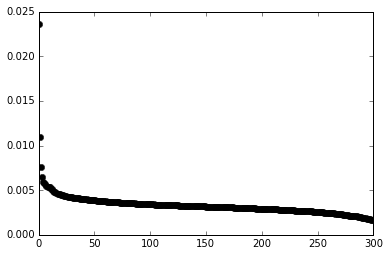

In [9]:
sigma=S/np.sum(S)
print (S**2).shape
plt.plot(sigma,'ko')

In [15]:
NewFeatures=np.diag(S)*V.T
print NewFeatures.shape
NewFeatures=NewFeatures.T

(300, 300)


In [18]:
s=0
N=20
for j in range(N):
#     clf = RandomForestClassifier()
    clf = RandomForestClassifier()
    clf.fit(NewFeatures, Ytrain)  
    Predict=clf.predict(Xvalid*U)
    s+=np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100
    print(np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100)
s=s/N
print s

50.0
47.6666666667
49.6666666667
53.3333333333
51.0
48.6666666667
50.6666666667
50.3333333333
53.0
52.6666666667
50.0
49.6666666667
52.0
53.6666666667
46.3333333333
48.0
45.6666666667
51.3333333333
46.3333333333
48.3333333333
49.9166666667
